In [61]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [62]:
df = pd.read_csv('./北區所友＿扣掉大怪獸_20160901_20170831.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,2016/09,北區,行政大樓,主迴路,行政,10034.91
1,2016/10,北區,行政大樓,主迴路,行政,8487.64
2,2016/11,北區,行政大樓,主迴路,行政,1920.39
3,2016/12,北區,行政大樓,主迴路,行政,125.61
4,2017/01,北區,行政大樓,主迴路,行政,172.42


In [63]:
#用pd.describe()了解資料
#newdf 是只看時間與用電量的 資料子集
newdf= df[['﻿時  間','用電量(單位:度)']]
print(newdf.describe()) 
print(newdf.shape) #How many data?


          用電量(單位:度)
count  7.200000e+02
mean   8.243257e+35
std    1.578737e+37
min    0.000000e+00
25%    1.446365e+03
50%    8.231860e+03
75%    3.596567e+04
max    3.389700e+38
(720, 2)


### 我們發現Max大的誇張，應該有統計錯誤

In [64]:
df1 = df #在df1實驗，不會搞雜原來的資料集
df1.head()
df1[df1['用電量(單位:度)'] > 100000000] #找出過大的資料

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
62,2016/11,北區,活動中心,第一餐聽,外租,1.176367e+08
63,2016/12,北區,活動中心,第一餐聽,外租,6.677306e+09
64,2017/01,北區,活動中心,第一餐聽,外租,1.180436e+09
65,2017/02,北區,活動中心,第一餐聽,外租,4.695179e+09
66,2017/03,北區,活動中心,第一餐聽,外租,1.495147e+09
676,2017/01,北區,第二餐廳,3F員工餐廳L燈力,外租,2.545445e+38
678,2017/03,北區,第二餐廳,3F員工餐廳L燈力,外租,3.389700e+38


In [66]:
#df1 = df1.drop(df1.index[[675,677]]) #把676,678拿掉
df2 = df[df1['用電量(單位:度)'] < 100000] #把太大的拿掉

#df2[df2['用電量(單位:度)'] > 100000000]
df2.describe() 

,用電量(單位:度)
count,641.000000
mean,15916.220811
std,21567.456104
min,0.000000
25%,1217.340000
50%,4788.030000
75%,23295.000000
max,99403.500000


In [67]:
df2.shape

(641, 6)

In [68]:
df2 = df2[df2['用電量(單位:度)'] > 10]
print (df2.shape)
print (718-682, ": number of rows that are 0")

(605, 6)
36 : number of rows that are 0


In [69]:
df2.describe()

,用電量(單位:度)
count,605.000000
mean,16863.301719
std,21837.634709
min,28.500000
25%,1542.720000
50%,6001.630000
75%,24079.130000
max,99403.500000


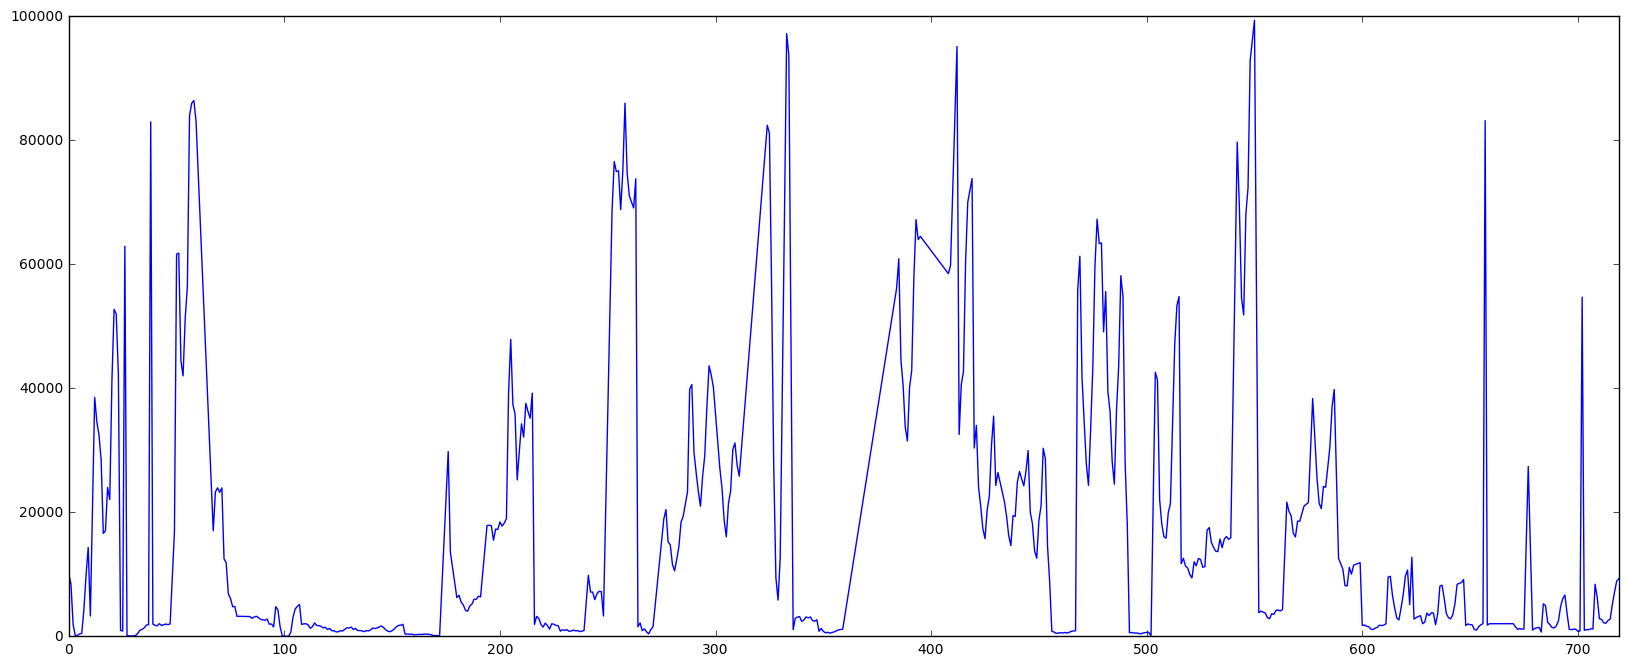

In [70]:
df2['用電量(單位:度)'].plot.line()
#matplotlib.pyplot.title('Electricity usage per 15 min (In 2 weeks, unit: degree)')

In [71]:
df3 = df2
df3.columns
df3.describe()

,用電量(單位:度)
count,605.000000
mean,16863.301719
std,21837.634709
min,28.500000
25%,1542.720000
50%,6001.630000
75%,24079.130000
max,99403.500000


In [85]:
df3.groupby(['﻿時  間','館 舍 別']).count()['用電量(單位:度)']

﻿時  間    館 舍 別               
2016/09  中正堂                      3
         人社一館                     1
         學生九舍                     1
         學生十一舍                    1
         學生十一舍_研一舍                1
         學生十舍                     2
         工程一館                     1
         工程二館                     1
         污水場                      1
         活動中心                     8
         游泳館                      1
         環保大樓                     1
         研究生一舍                    1
         科學一館                     1
         竹軒宿舍                     1
         第一招待所                    1
         第二餐廳                    10
         行政大樓                     1
         資訊館(北區)                  1
         電資大樓                     3
         體育館                      3
2016/10  中正堂                      3
         人社一館                     1
         學生九舍                     1
         學生十一舍                    1
         學生十一舍_研一舍                1
         學生十舍                     

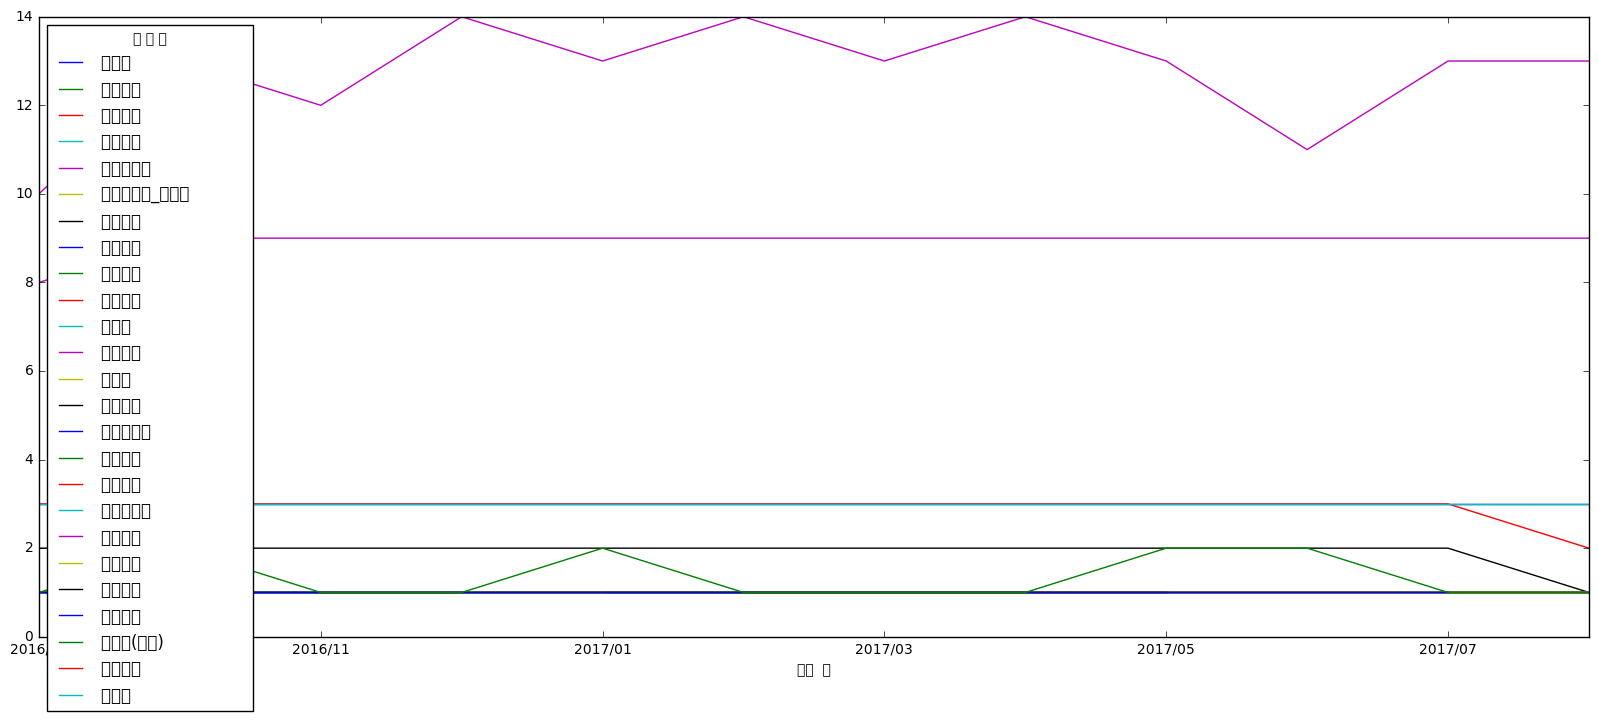

In [90]:
df3.groupby(['﻿時  間','館 舍 別']).count()['用電量(單位:度)'].unstack().plot()


In [131]:
df3.columns

Index(['﻿時  間', '區 域', '館 舍 別', '迴 路 別', '用電別', '用電量(單位:度)'], dtype='object')

In [136]:
df3 = df3.rename(index=str, columns={'﻿時  間':"date",'用電量(單位:度)':"Usage",'迴 路 別':'loop','用電別':'types,','區 域':'area','館 舍 別':'bd_name'}) 
df3.columns

Index(['Date_Time', 'area', 'bd_name', 'loop', 'types,', 'Usage'], dtype='object')

In [138]:
df3.head()

,Date_Time,area,bd_name,loop,"types,",Usage
0,2016/09,北區,行政大樓,主迴路,行政,10034.91
1,2016/10,北區,行政大樓,主迴路,行政,8487.64
2,2016/11,北區,行政大樓,主迴路,行政,1920.39
3,2016/12,北區,行政大樓,主迴路,行政,125.61
4,2017/01,北區,行政大樓,主迴路,行政,172.42


In [140]:
df3.Usage.mean()

16863.301719008297

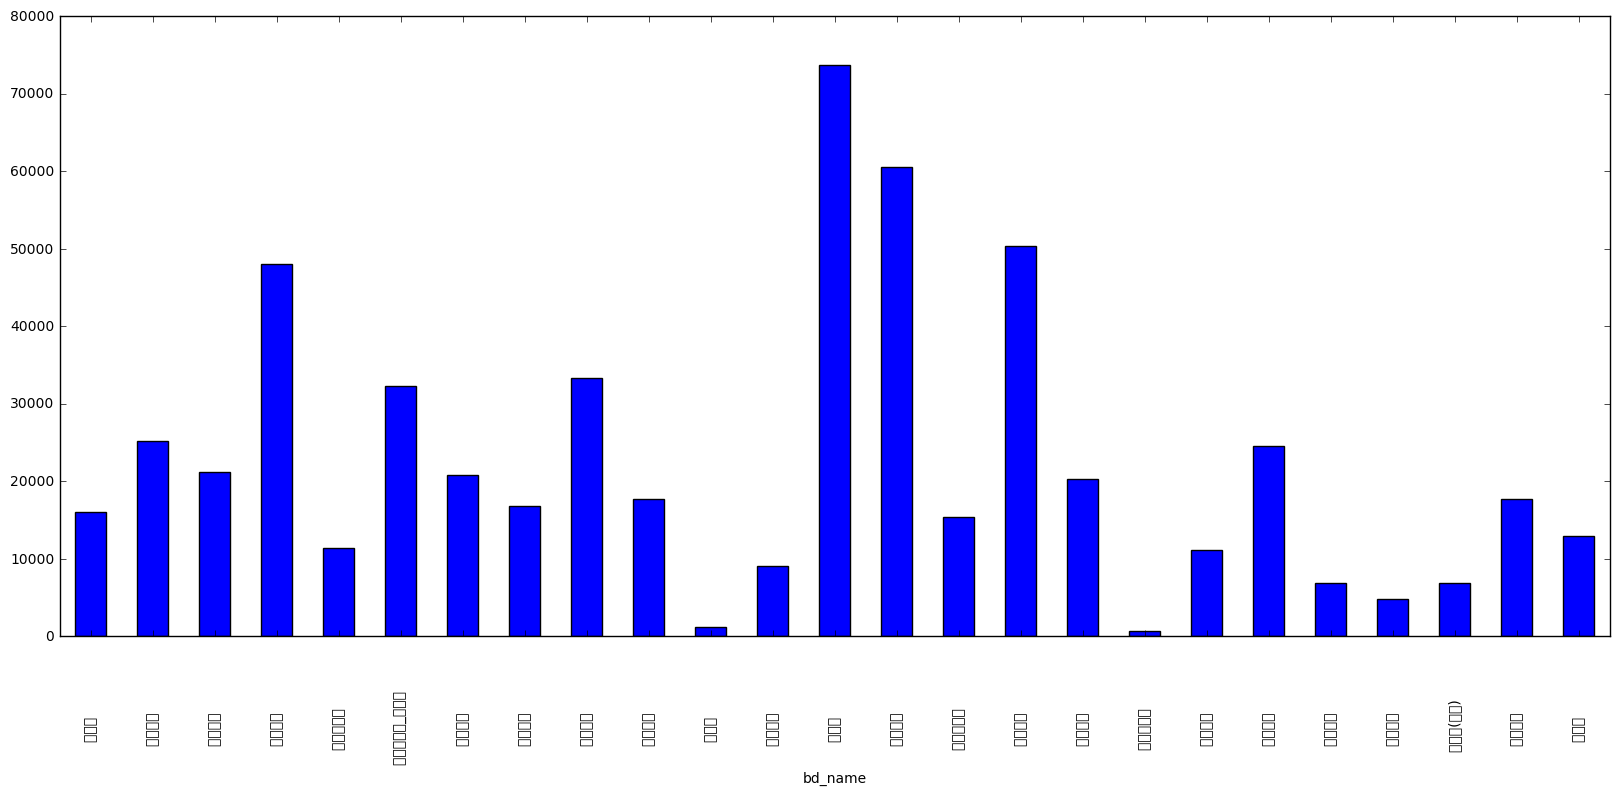

In [143]:
df3.groupby('bd_name').Usage.mean().plot.bar()

In [152]:
name ="""1. Management Building 1 管理一館
2. HA Building 2 人社二館
3. Administration Building 行政大樓
4. Chung Cheng Auditorium 中正堂
5. HA Building 1 人社一館
6. Engineering Building 1 工程一館
7. Engineering Building 2 工程二館
8. Science Building 1 科學一館
9. Information Building 資訊館
10. Engineering Building 3 工程三館
11. Dinning Hall 1 第一餐廳
12. Dinning Hall 2 第二餐廳
13. Badminton Building 羽球館
14. Gymnasium 體育館
15. Swimming Pool 游泳池
16. Field 田徑場
17. Student Dormitory 7 學生七舍
18. Student Dormitory 8 學生八舍
19. Chu-Hsuan Female 竹軒女舍
20. Student Dormitory 9 學生九舍
21. Student Dormitory 10 學生十舍
22. Graduate Student Dormitory 1 研一舍
23. Student Dormitory 11 學生十一舍
24. Engineering Building 4 工程四館
25. Management Building 2 管理二館
26. National Nano Device Lab 毫微米元件實驗室
27. Student Dormitory 12 學生十二舍
28. Science Building 2 科學二館
29. Student Activity Center 學生活動中心
30. Engineering Building 5 工程五館
31. Assembly Building 1 綜合一館
32. Student Dormitory 13 學生十三舍
33. Graduate Student Dormitory 2 研二舍
34. Library and Information Center 浩然圖書資訊中心
35. Microelectronics & Information 電子資訊中心
36. Civil Engineering Lab 土木實驗結構室
37. Female Student Dormitory 2 女二舍
38. Materials & Mechanical Engineering Lab材料實驗室
"""

In [158]:
name_list = name.splitlines()
for i in range(len(name_list)):
    name_list[i] = name_list[i].split()

name_list


bd_name_list = df3.bd_name.unique()
for i in range(len(name_list)):
    name_list[i] = [name_list[i][-1],''.join(name_list[i][1:-1])]


[['管理一館', 'ManagementBuilding1'],
 ['人社二館', 'HABuilding2'],
 ['行政大樓', 'AdministrationBuilding'],
 ['中正堂', 'ChungChengAuditorium'],
 ['人社一館', 'HABuilding1'],
 ['工程一館', 'EngineeringBuilding1'],
 ['工程二館', 'EngineeringBuilding2'],
 ['科學一館', 'ScienceBuilding1'],
 ['資訊館', 'InformationBuilding'],
 ['工程三館', 'EngineeringBuilding3'],
 ['第一餐廳', 'DinningHall1'],
 ['第二餐廳', 'DinningHall2'],
 ['羽球館', 'BadmintonBuilding'],
 ['體育館', 'Gymnasium'],
 ['游泳池', 'SwimmingPool'],
 ['田徑場', 'Field'],
 ['學生七舍', 'StudentDormitory7'],
 ['學生八舍', 'StudentDormitory8'],
 ['竹軒女舍', 'Chu-HsuanFemale'],
 ['學生九舍', 'StudentDormitory9'],
 ['學生十舍', 'StudentDormitory10'],
 ['研一舍', 'GraduateStudentDormitory1'],
 ['學生十一舍', 'StudentDormitory11'],
 ['工程四館', 'EngineeringBuilding4'],
 ['管理二館', 'ManagementBuilding2'],
 ['毫微米元件實驗室', 'NationalNanoDeviceLab'],
 ['學生十二舍', 'StudentDormitory12'],
 ['科學二館', 'ScienceBuilding2'],
 ['學生活動中心', 'StudentActivityCenter'],
 ['工程五館', 'EngineeringBuilding5'],
 ['綜合一館', 'AssemblyBuilding1'],
 ['學生十三舍',

In [176]:
# Clear white space in string 
for i in range(len(bd_name_list)):
    bd_name_list[i] = bd_name_list[i].replace(" ", "")
bd_name_list 

array(['行政大樓', '中正堂', '活動中心', '資訊館(北區)', '機車Ｄ棚', '體育館', '綜合球館', '游泳館',
       '污水場', '工程一館', '工程二館', '管理一館', '電資大樓', '科學一館', '環保大樓', '人社一館',
       '人社二館', '竹軒宿舍', '第一招待所', '學生九舍', '學生十舍', '學生十一舍_研一舍', '學生十一舍',
       '研究生一舍', '第二餐廳'], dtype=object)

In [177]:
name_list_ch = []
for i in range(len(name_list)): 
    name_list_ch.append(name_list[i][0])
print(name_list_ch)
print(bd_name_list)

['管理一館', '人社二館', '行政大樓', '中正堂', '人社一館', '工程一館', '工程二館', '科學一館', '資訊館', '工程三館', '第一餐廳', '第二餐廳', '羽球館', '體育館', '游泳池', '田徑場', '學生七舍', '學生八舍', '竹軒女舍', '學生九舍', '學生十舍', '研一舍', '學生十一舍', '工程四館', '管理二館', '毫微米元件實驗室', '學生十二舍', '科學二館', '學生活動中心', '工程五館', '綜合一館', '學生十三舍', '研二舍', '浩然圖書資訊中心', '電子資訊中心', '土木實驗結構室', '女二舍', 'Lab材料實驗室']
['行政大樓' '中正堂' '活動中心' '資訊館(北區)' '機車Ｄ棚' '體育館' '綜合球館' '游泳館' '污水場' '工程一館'
 '工程二館' '管理一館' '電資大樓' '科學一館' '環保大樓' '人社一館' '人社二館' '竹軒宿舍' '第一招待所' '學生九舍'
 '學生十舍' '學生十一舍_研一舍' '學生十一舍' '研究生一舍' '第二餐廳']


In [179]:
print (set(bd_name_list)&set(name_list_ch)) 
print (set(bd_name_list)-set(name_list_ch)) 
print (set(name_list_ch)-set(bd_name_list)) 


{'行政大樓', '管理一館', '人社二館', '學生十舍', '體育館', '科學一館', '工程二館', '工程一館', '人社一館', '第二餐廳', '中正堂', '學生九舍', '學生十一舍'}
{'污水場', '資訊館(北區)', '電資大樓', '綜合球館', '活動中心', '第一招待所', '環保大樓', '研究生一舍', '游泳館', '學生十一舍_研一舍', '竹軒宿舍', '機車Ｄ棚'}
{'研一舍', '學生十二舍', '電子資訊中心', '女二舍', '學生八舍', '工程三館', '研二舍', '田徑場', '工程五館', '管理二館', '學生十三舍', '竹軒女舍', '浩然圖書資訊中心', '土木實驗結構室', '第一餐廳', '毫微米元件實驗室', 'Lab材料實驗室', '學生活動中心', '工程四館', '學生七舍', '游泳池', '科學二館', '綜合一館', '資訊館', '羽球館'}


In [121]:
for item in name_list:
    print (item[1:-1])

['Management', 'Building', '1']
['HA', 'Building', '2']
['Administration', 'Building']
['Chung', 'Cheng', 'Auditorium']
['HA', 'Building', '1']
['Engineering', 'Building', '1']
['Engineering', 'Building', '2']
['Science', 'Building', '1']
['Information', 'Building']
['Engineering', 'Building', '3']
['Dinning', 'Hall', '1']
['Dinning', 'Hall', '2']
['Badminton', 'Building']
['Gymnasium']
['Swimming', 'Pool']
['Field']
['Student', 'Dormitory', '7']
['Student', 'Dormitory', '8']
['Chu-Hsuan', 'Female']
['Student', 'Dormitory', '9']
['Student', 'Dormitory', '10']
['Graduate', 'Student', 'Dormitory', '1']
['Student', 'Dormitory', '11']
['Engineering', 'Building', '4']
['Management', 'Building', '2']
['National', 'Nano', 'Device', 'Lab']
['Student', 'Dormitory', '12']
['Science', 'Building', '2']
['Student', 'Activity', 'Center']
['Engineering', 'Building', '5']
['Assembly', 'Building', '1']
['Student', 'Dormitory', '13']
['Graduate', 'Student', 'Dormitory', '2']
['Library', 'and', 'Informat

Index(['Date_Time', 'Usage'], dtype='object')

In [50]:
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
# print (df_hr.head(),df_min.head())
newdf.loc[:,'hr'] = pd.Series(df_hr)
newdf.loc[:,'min'] = pd.Series(df_min)
newdf.Date_Time = newdf.Date_Time.str[:-6]
newdf.head()

,Date_Time,Usage,hr,min
0,2017/10/01,91.0,00,00
1,2017/10/01,92.0,00,15
2,2017/10/01,91.0,00,30
3,2017/10/01,91.0,00,45
4,2017/10/01,90.0,01,00


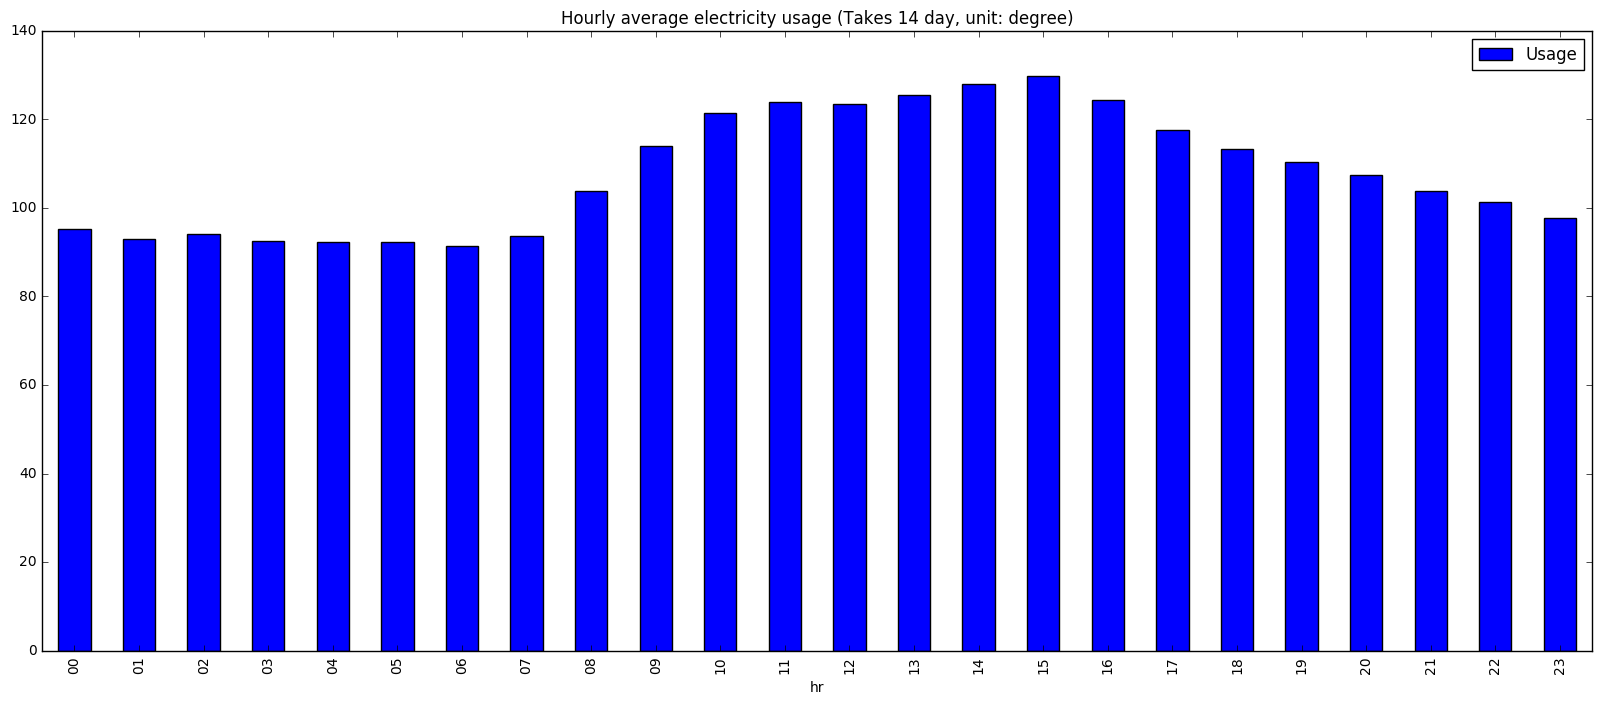

In [51]:
#科三每小時平均用電量, 範圍 10.01(Sun) - 10.14(Sat.)
dfnew_gpby = newdf.groupby(['hr'])
dfnew_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

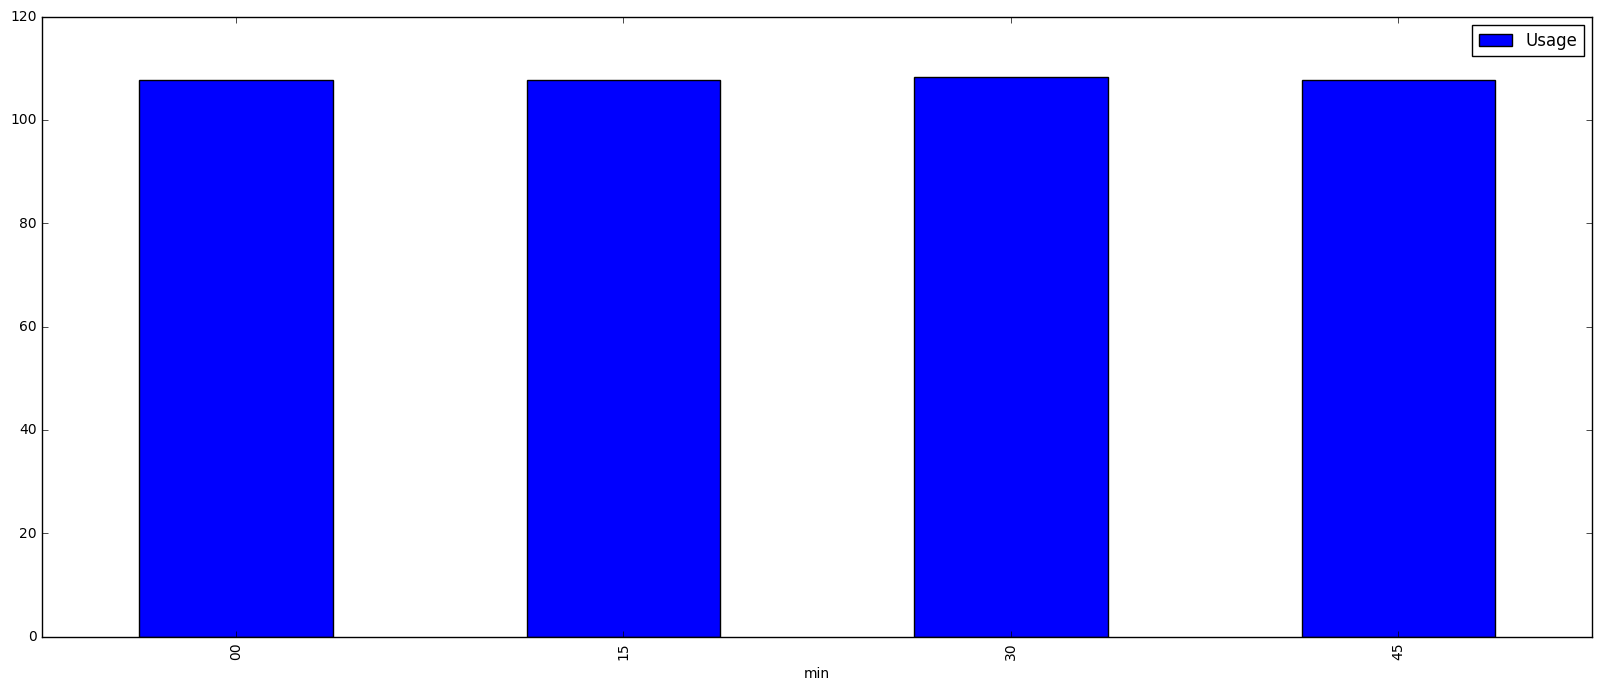

In [61]:
#科三每15分鐘用電量 
#沒什麼意義
dfnew_gpby = newdf.groupby(['min'])
dfnew_gpby.mean().plot.bar()
# matplotlib.pyplot.title('Minute average electricity usage (Takes 14 day, unit: degree)')

Date_Time
2017/10/01    Axes(0.125,0.125;0.775x0.775)
2017/10/02    Axes(0.125,0.125;0.775x0.775)
2017/10/03    Axes(0.125,0.125;0.775x0.775)
2017/10/04    Axes(0.125,0.125;0.775x0.775)
2017/10/05    Axes(0.125,0.125;0.775x0.775)
2017/10/06    Axes(0.125,0.125;0.775x0.775)
2017/10/07    Axes(0.125,0.125;0.775x0.775)
2017/10/08    Axes(0.125,0.125;0.775x0.775)
2017/10/09    Axes(0.125,0.125;0.775x0.775)
2017/10/10    Axes(0.125,0.125;0.775x0.775)
2017/10/11    Axes(0.125,0.125;0.775x0.775)
2017/10/12    Axes(0.125,0.125;0.775x0.775)
2017/10/13    Axes(0.125,0.125;0.775x0.775)
2017/10/14    Axes(0.125,0.125;0.775x0.775)
dtype: object

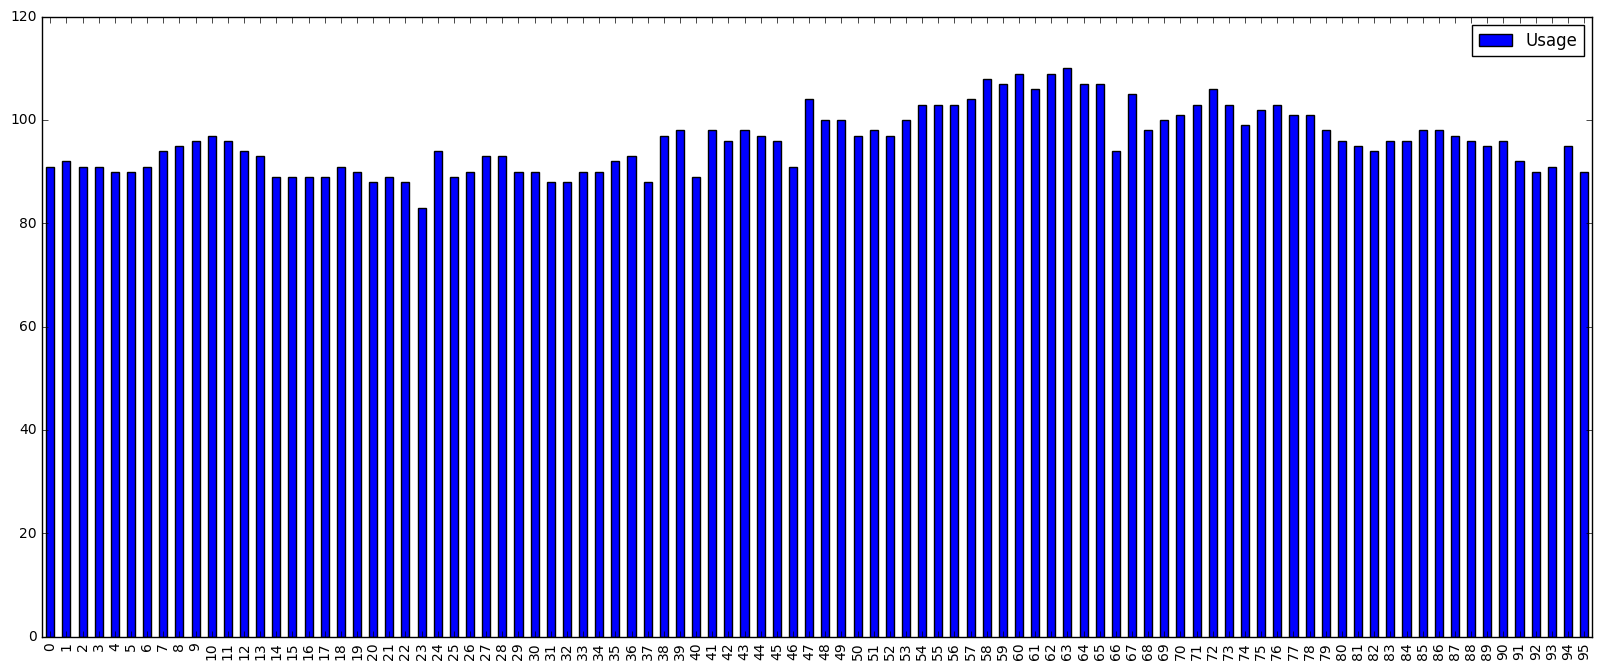

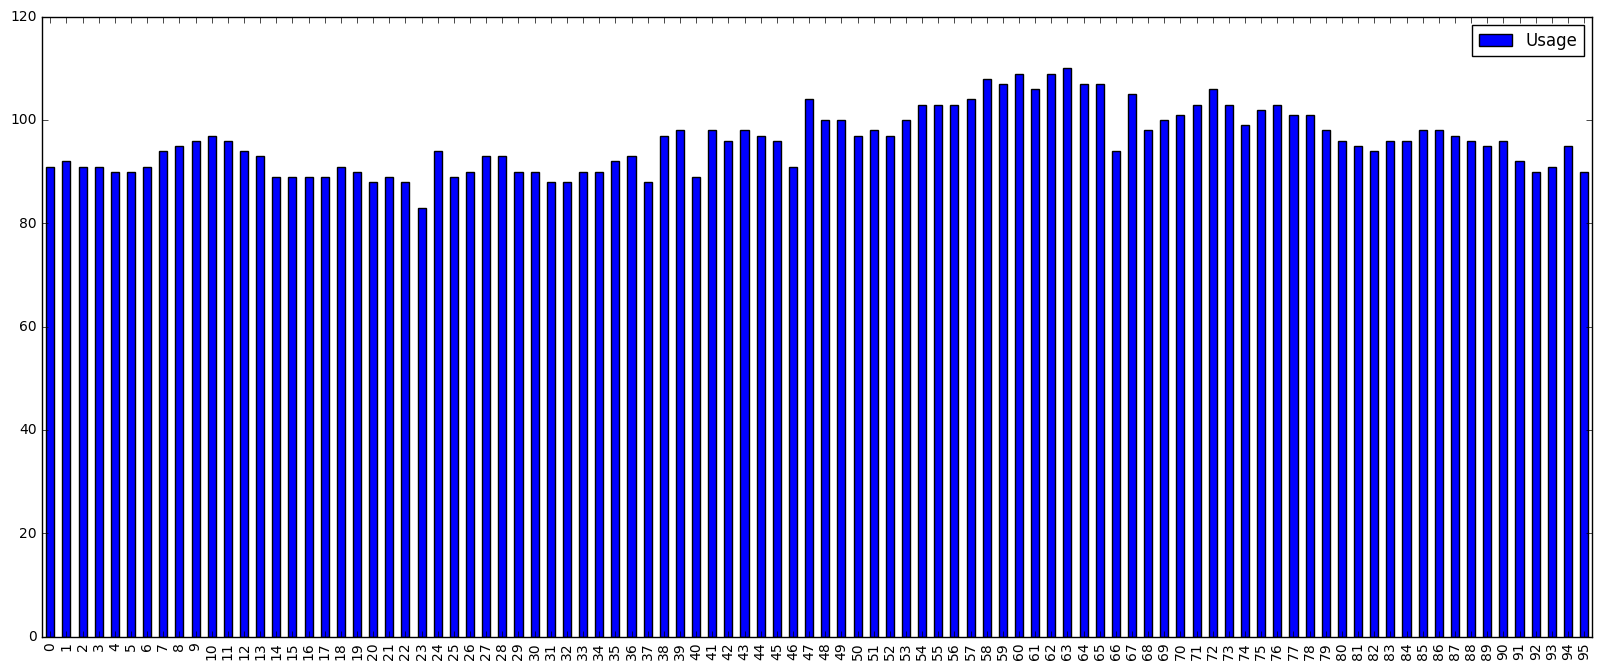

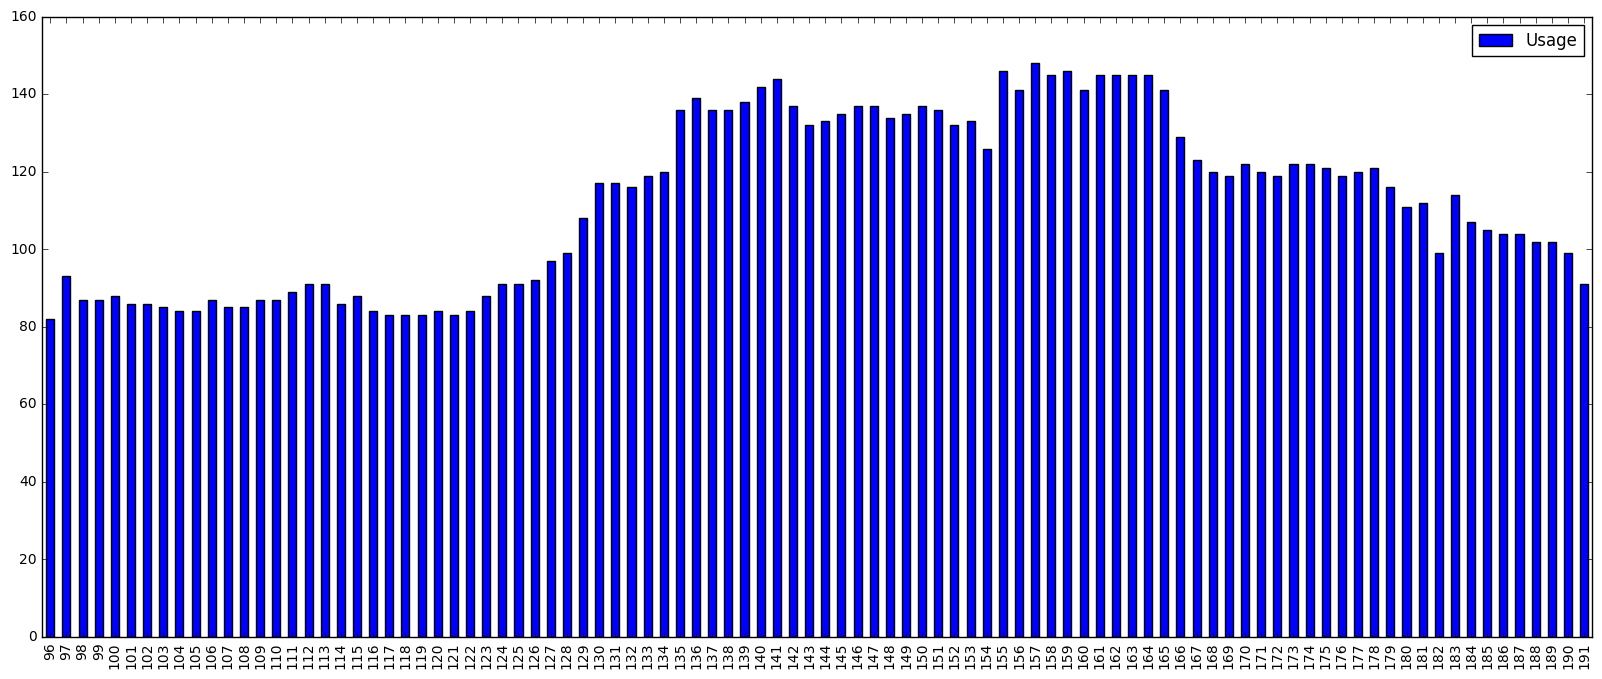

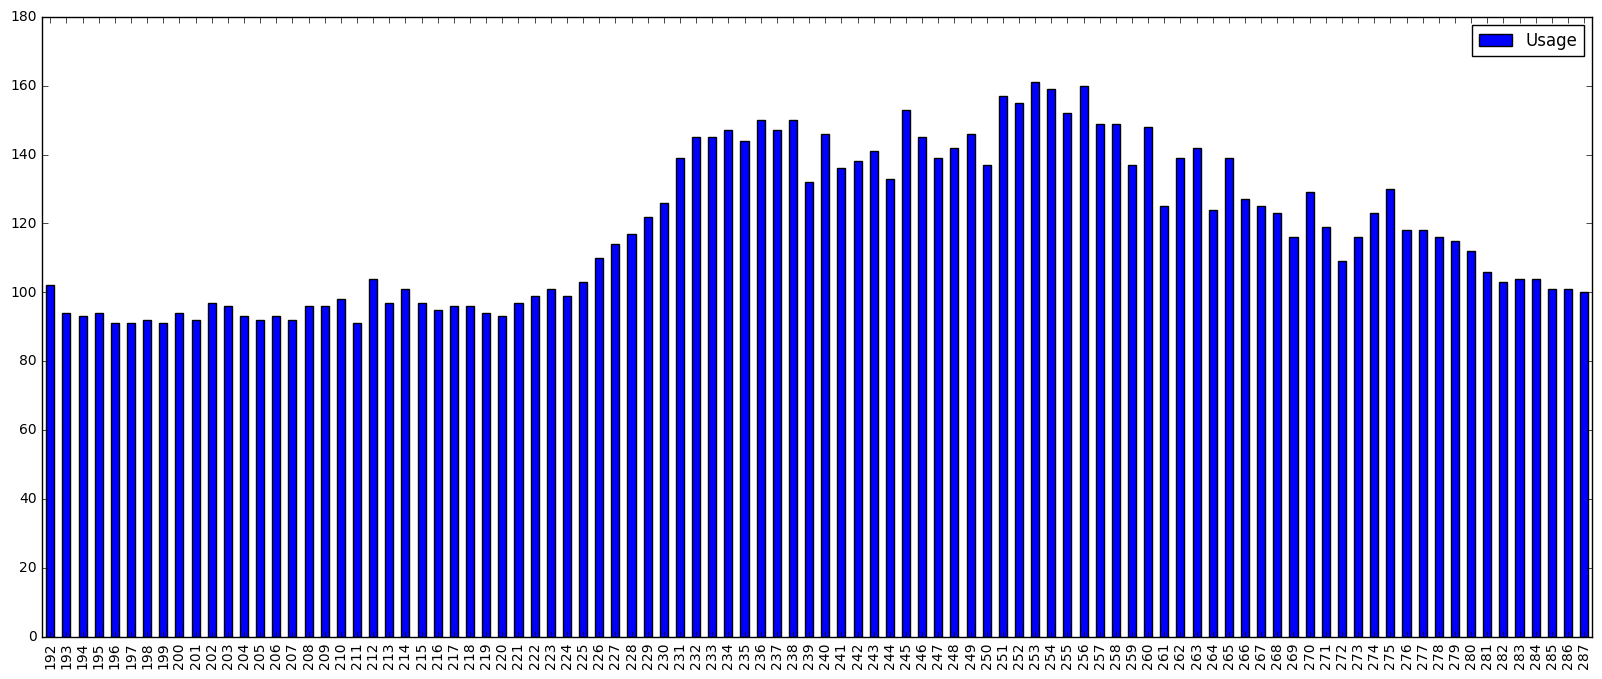

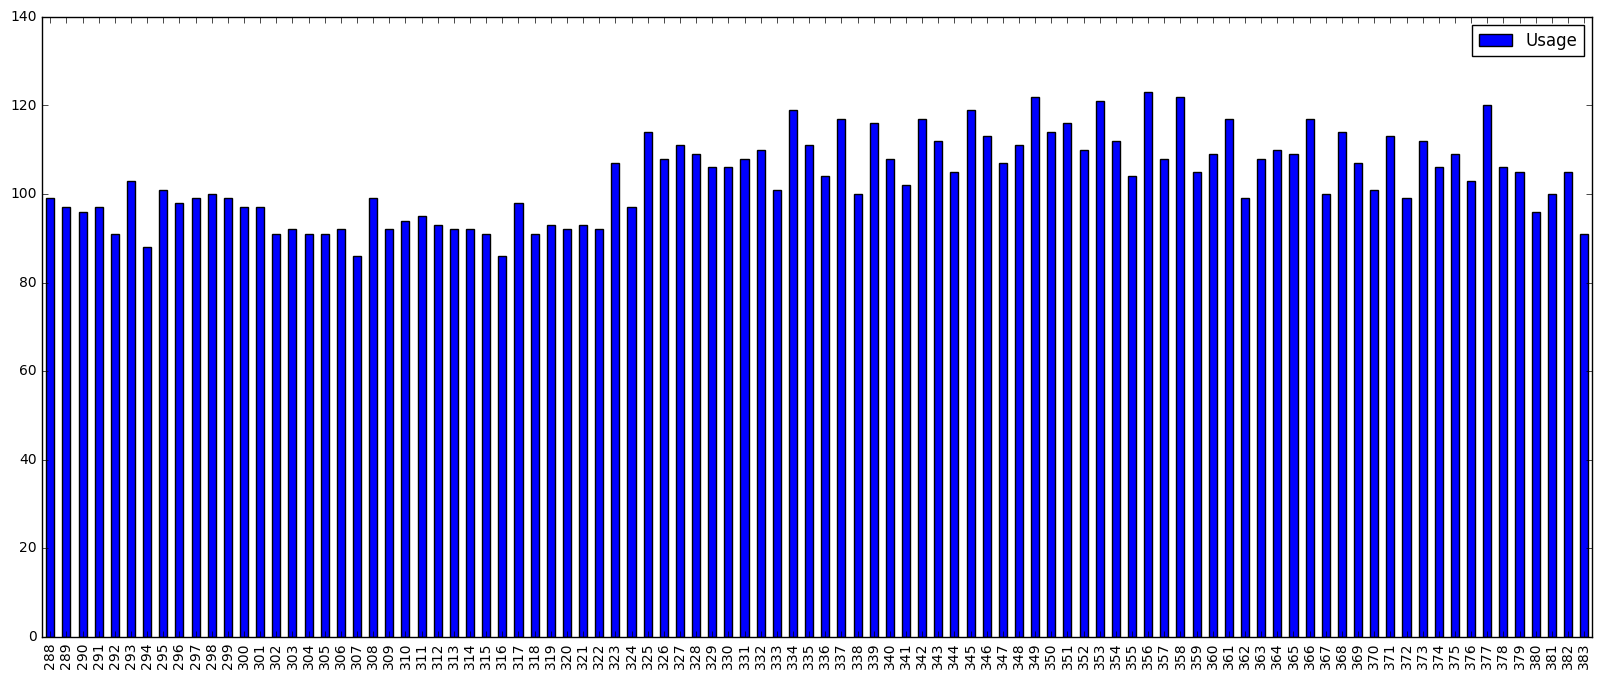

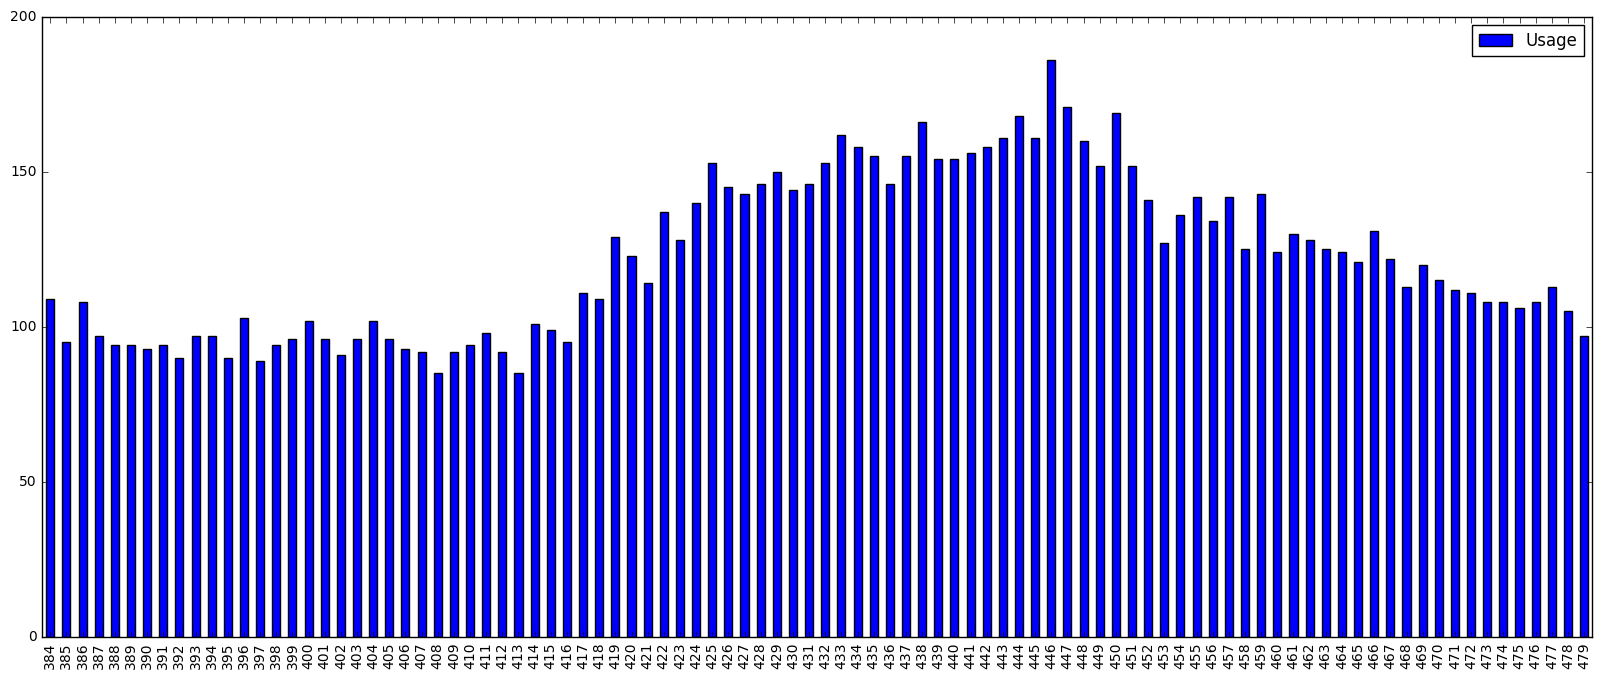

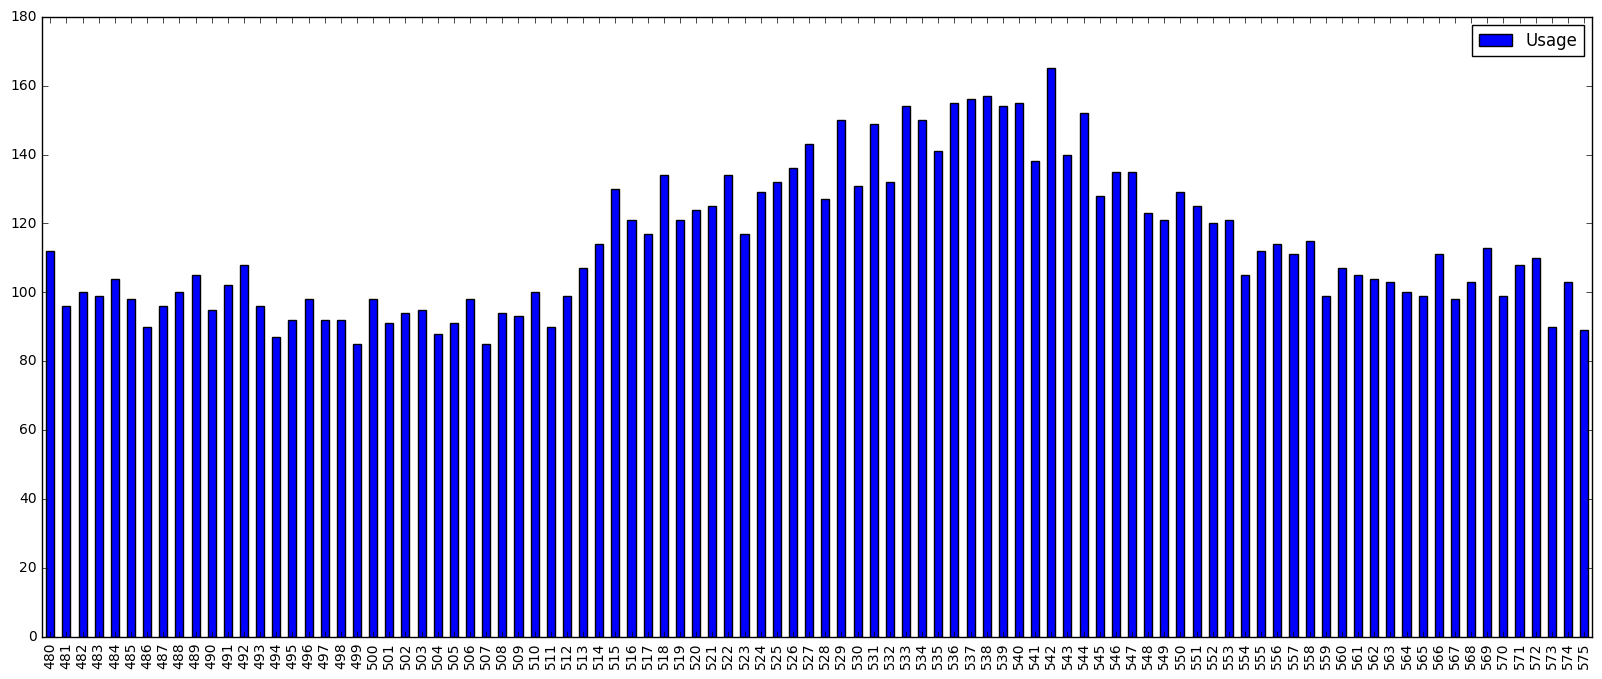

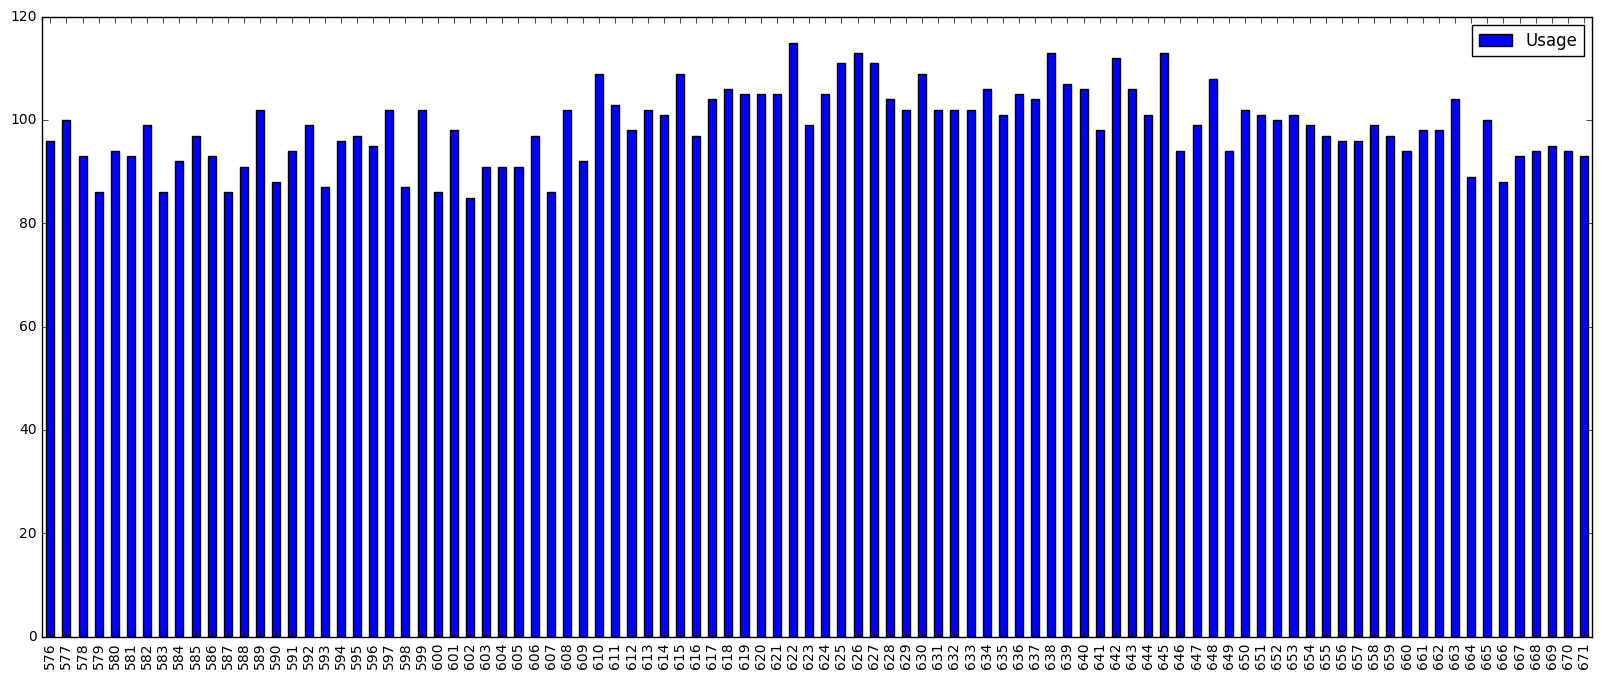

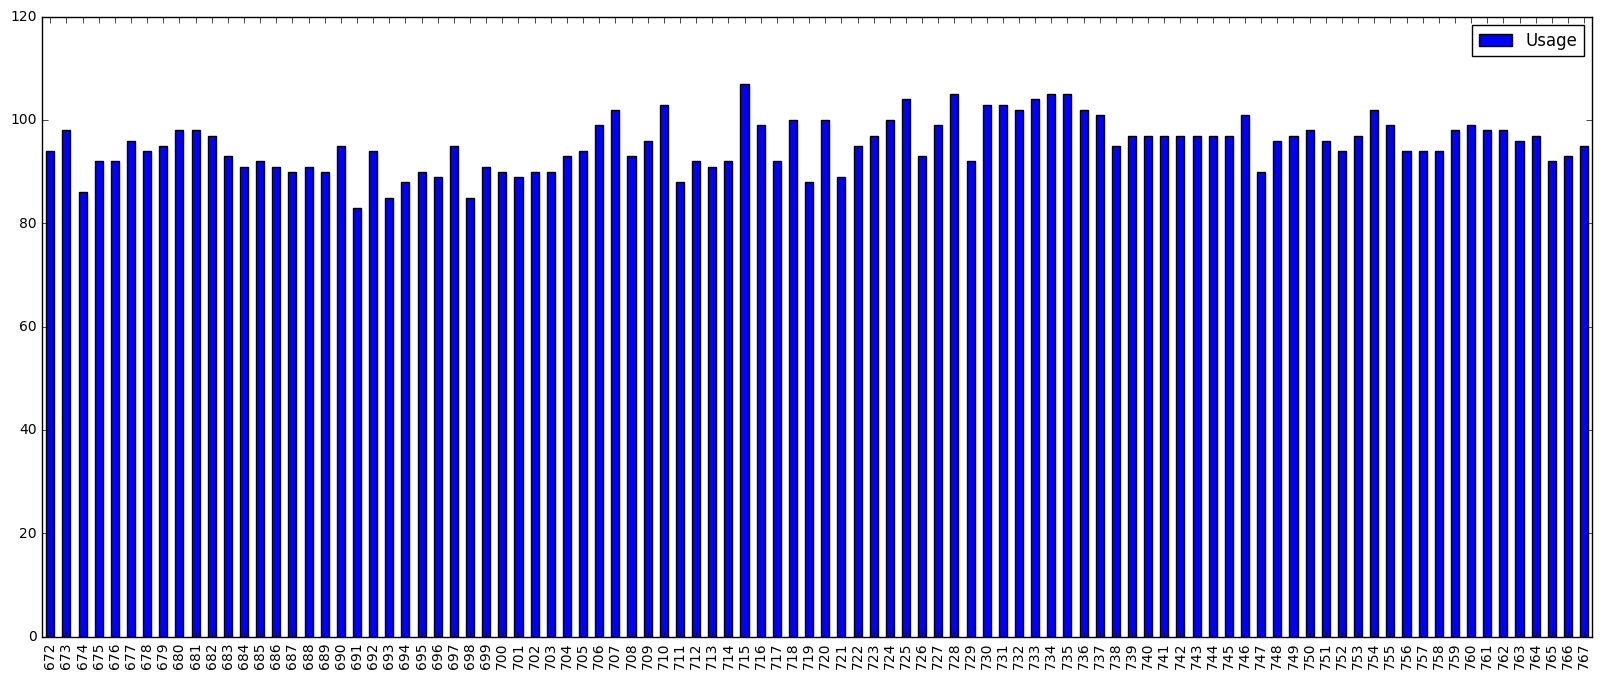

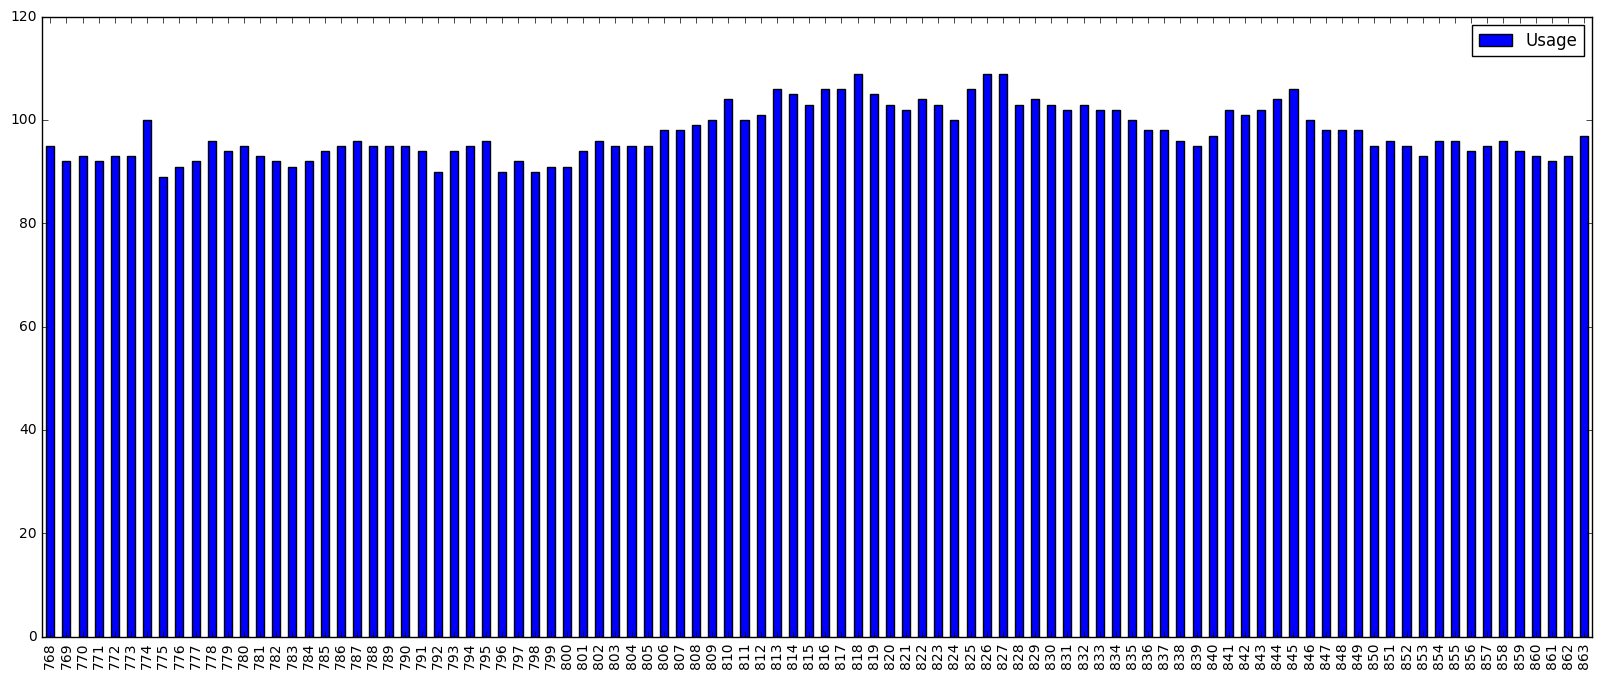

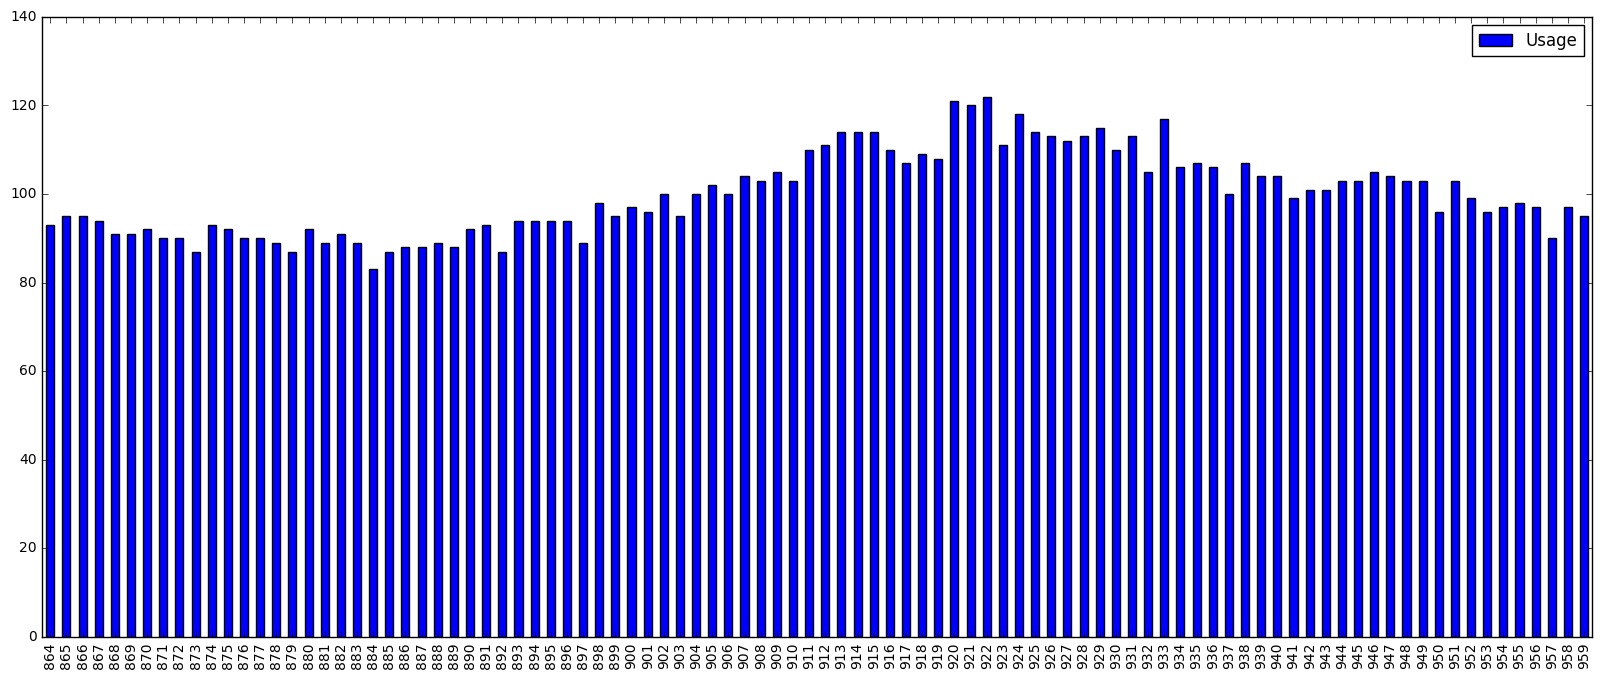

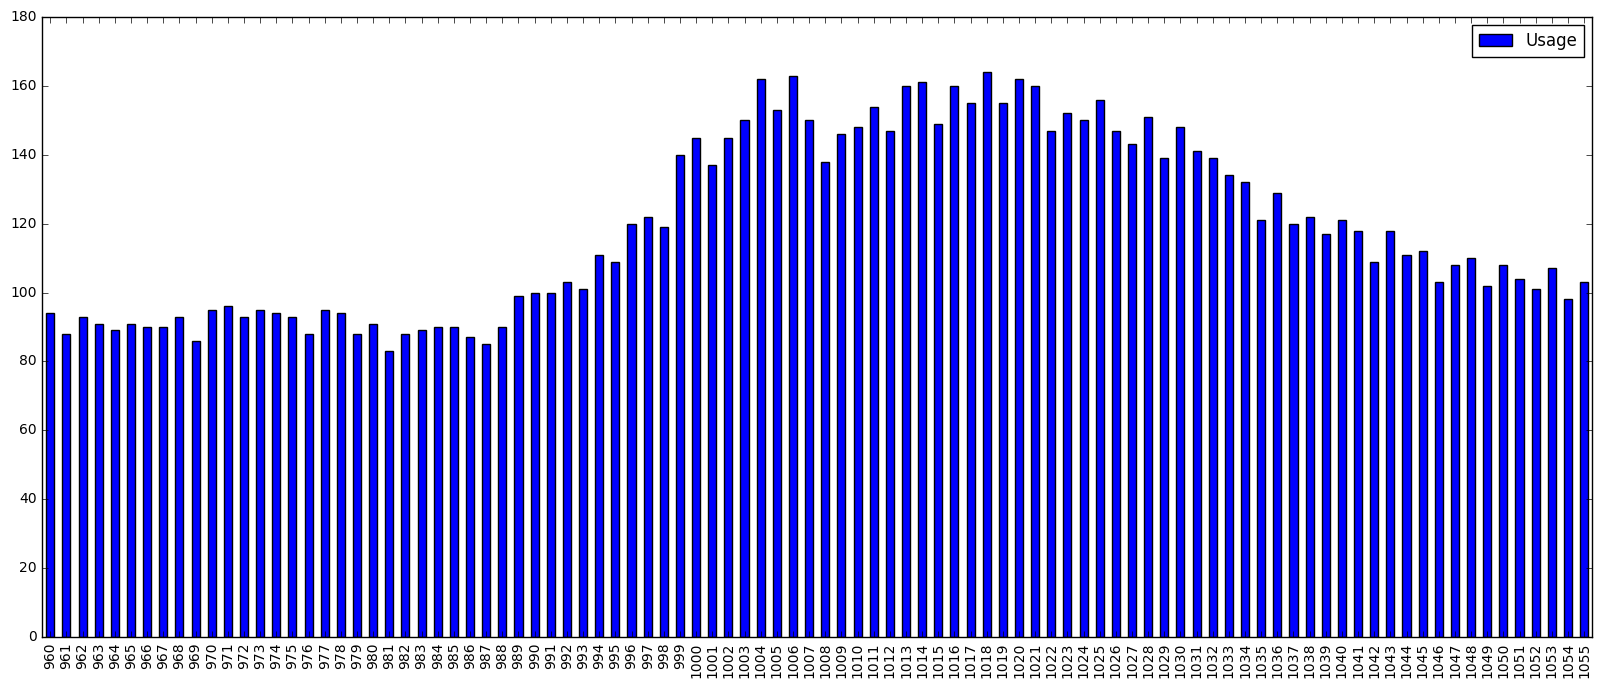

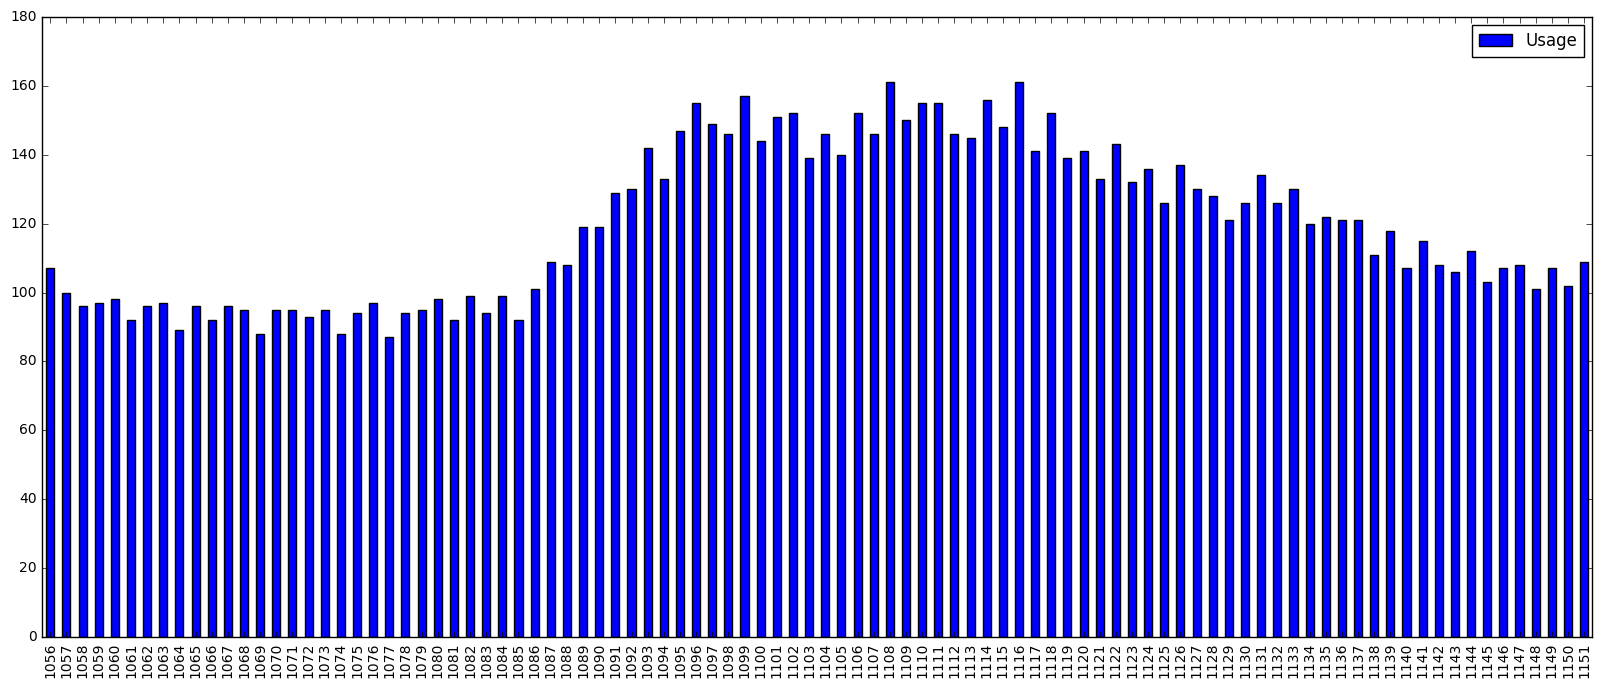

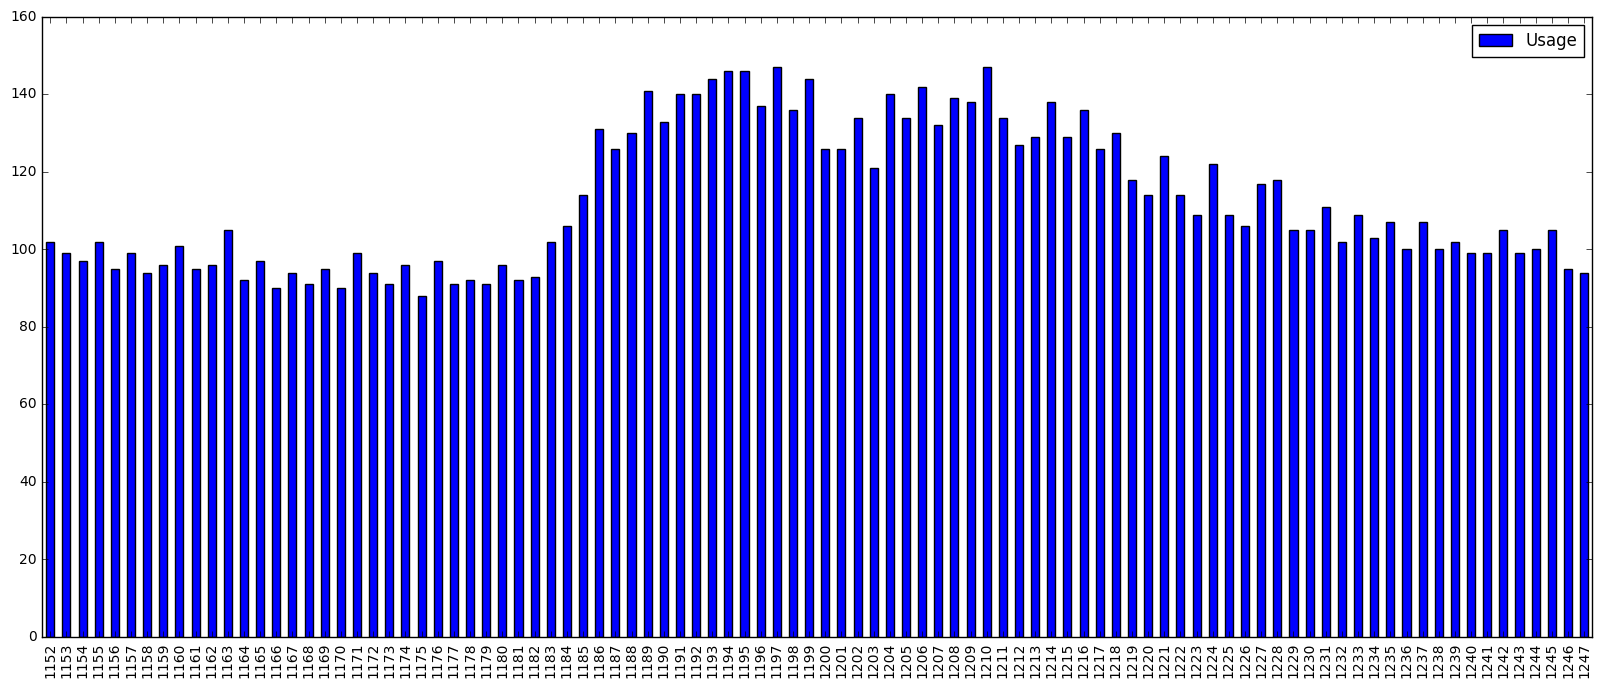

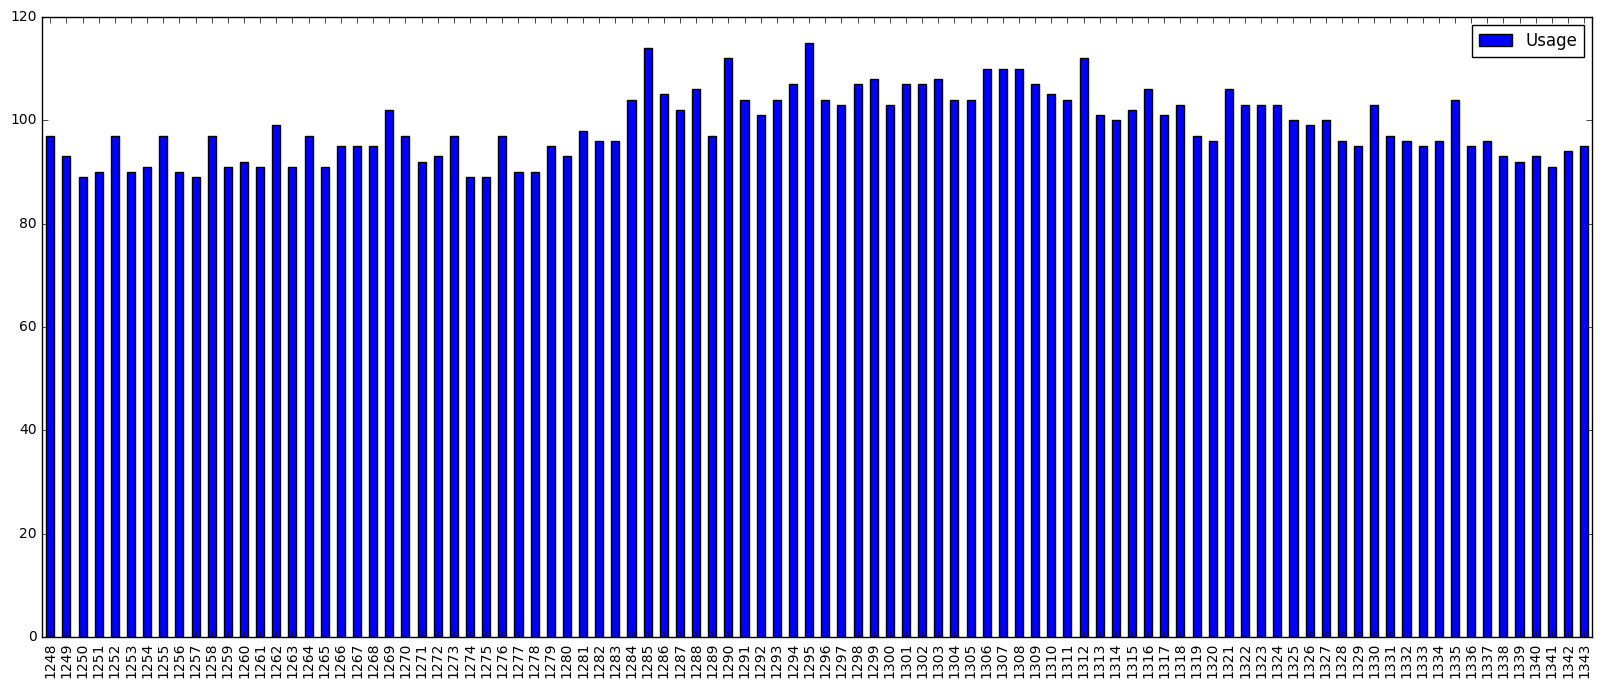

In [60]:
dfnew_byDay = newdf.groupby(['Date_Time'])
dfnew_byDay.plot.bar(stacked=True)

In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')

In [63]:
plt.bar( 
        #using df['pre_score'] data,
        dfnew_byDay.Usage, 
        # of width
#         width, 
        # with alpha 0.5
#         alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
#         label=dfnew_byDay['Date_Time'][0]
) 

TypeError: bar() missing 1 required positional argument: 'height'

In [64]:
?plt.bar

In [ ]:
''